In [1]:
#importing the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset

df = pd.read_csv('advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.shape

(200, 5)

In [8]:
df = df.iloc[:,1:]

In [9]:
df.sample(10)

,TV,Radio,Newspaper,Sales
171,164.5,20.9,47.4,14.5
169,284.3,10.6,6.4,15.0
117,76.4,0.8,14.8,9.4
111,241.7,38.0,23.2,21.8
166,17.9,37.6,21.6,8.0
137,273.7,28.9,59.7,20.8
55,198.9,49.4,60.0,23.7
19,147.3,23.9,19.1,14.6
153,171.3,39.7,37.7,19.0
38,43.1,26.7,35.1,10.1


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df = df[df["Newspaper"] <= 100]

In [13]:
df.shape

(198, 4)

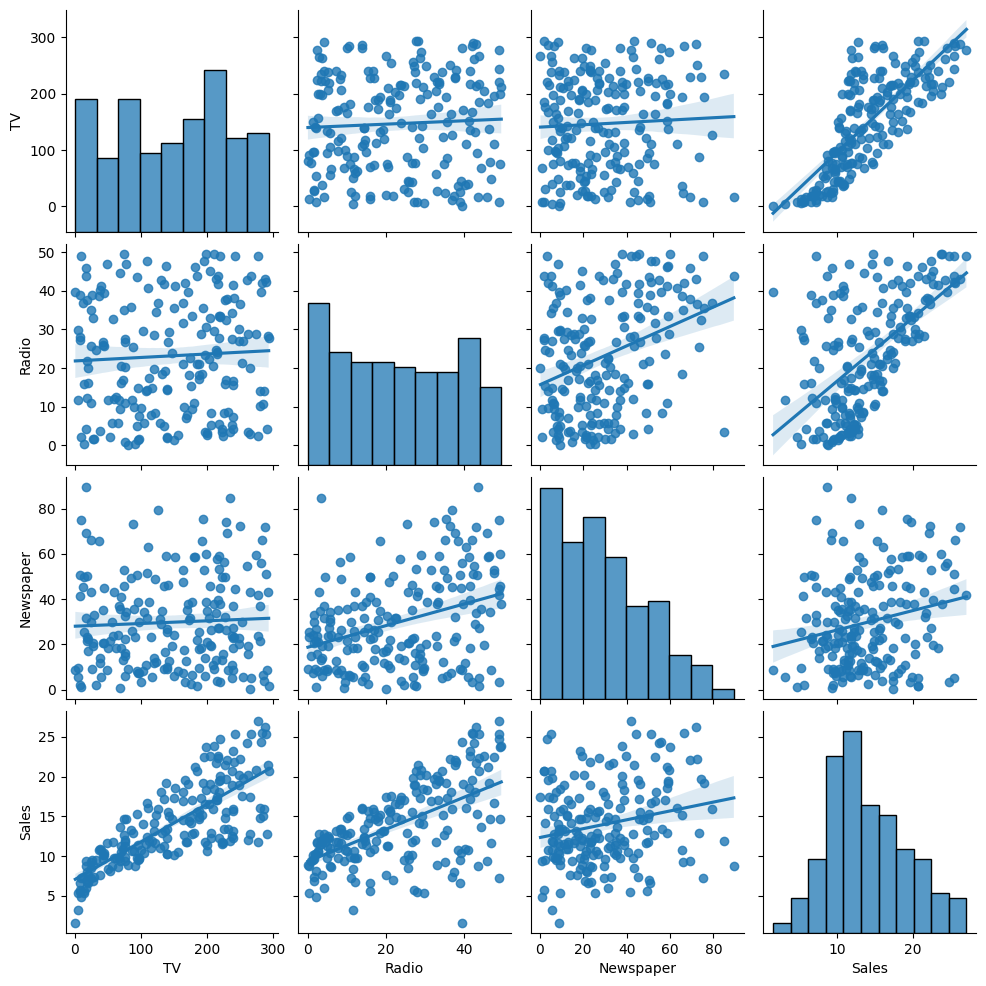

In [14]:
sns.pairplot(df,kind="reg")

C:\Users\kakli\AppData\Local\Temp\ipykernel_24216\1677444173.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


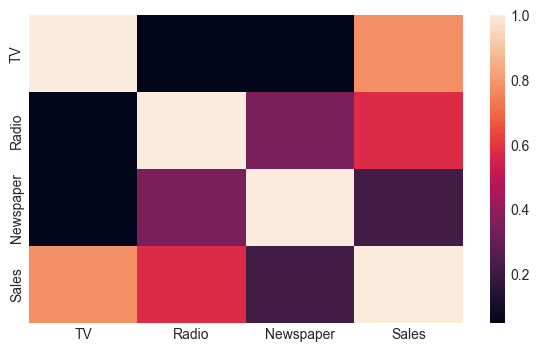

In [15]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,4))
sns.heatmap(df.corr())
plt.show()

In [16]:
x = df.drop(columns = ['Sales'])
y = df['Sales']

In [17]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [18]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [19]:
#importiong libraries from sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [21]:
x_train.head()

,TV,Radio,Newspaper
152,197.6,23.3,14.2
105,137.9,46.4,59.0
100,222.4,4.3,49.8
33,265.6,20.0,0.3
7,120.2,19.6,11.6


In [22]:
model = LinearRegression()

In [23]:
model.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)

In [25]:
r2_score(y_test, y_pred)

0.8630693523079863

In [26]:
#Check our prediction

data = pd.DataFrame(data={"Predicted_Sales": y_pred.flatten()})
data

,Predicted_Sales
0,11.419190
1,12.639582
2,16.918517
3,11.872025
4,12.083359
5,9.491948
6,7.564344
7,10.440191
8,9.788008
9,17.240101


In [27]:
model.predict([[283.6, 42.0, 66.2]])

C:\Users\kakli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.97171349])

In [28]:
#Saving the model

import pickle
pickle.dump(model,open('Sales.pkl','wb'))